### fdk 결과물 비교

In [2]:
%cd /home/byeoli0832/sparse_view_test/FusionLowDoseCBCT
%pwd

import matplotlib.pyplot as plt
import imageio as iio
import os
import numpy as np

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def compute_ssim(img1, img2):
  ssim_value, _ = ssim(img1, img2, full=True)
  return ssim_value

def compute_psnr(img1, img2, max_val=1.0):
  # PSNR 계산
  return psnr(img1, img2, data_range=max_val)

def img_normal(img):
    return ((img - img.min()) / (img.max() - img.min())).astype(np.float32)

origin_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div1_fkd"
sparse_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div2_fkd"
jdinet_interp_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation_fkd"
jdinet_interp_fdk_post = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation_fkd_post"
emavfi_ours_small_interp_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_small_walnut19_div2_interpolation_fdk"
emavfi_ours_interp_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_walnut19_div2_interpolation_fdk"

num_list = list(range(1,201))
img2_ssim = []
img2_psnr = []
img3_ssim = []
img3_psnr = []
img4_ssim = []
img4_psnr = []
img5_ssim = []
img5_psnr = []
img6_ssim = []
img6_psnr = []

for num in num_list:
  file_name = f"fdk_{num:06d}.png"
  img1 = iio.imread(os.path.join(origin_fdk, file_name))
  img2 = iio.imread(os.path.join(sparse_fdk, file_name))
  img3 = iio.imread(os.path.join(jdinet_interp_fdk, file_name))
  img4 = iio.imread(os.path.join(jdinet_interp_fdk_post, file_name))
  img5 = iio.imread(os.path.join(emavfi_ours_small_interp_fdk, file_name))
  img6 = iio.imread(os.path.join(emavfi_ours_interp_fdk, file_name))

  img1_normal = img_normal(img1)
  img2_normal = img_normal(img2)
  img3_normal = img_normal(img3)
  img4_normal = img_normal(img4)
  img5_normal = img_normal(img5)
  img6_normal = img_normal(img6)

  img2_ssim.append(compute_ssim(img1_normal, img2_normal))
  img3_ssim.append(compute_ssim(img1_normal, img3_normal))
  img4_ssim.append(compute_ssim(img1_normal, img4_normal))
  img5_ssim.append(compute_ssim(img1_normal, img5_normal))
  img6_ssim.append(compute_ssim(img1_normal, img6_normal))

  img2_psnr.append(compute_psnr(img1_normal, img2_normal))
  img3_psnr.append(compute_psnr(img1_normal, img3_normal))
  img4_psnr.append(compute_psnr(img1_normal, img4_normal))
  img5_psnr.append(compute_psnr(img1_normal, img5_normal))
  img6_psnr.append(compute_psnr(img1_normal, img6_normal))

print(f"sparse 1/2 (psnr, ssim) : ({np.mean(img2_psnr):0.2f}, {np.mean(img2_ssim):0.2f})")
print(f"JDINet (psnr, ssim) : ({np.mean(img3_psnr):0.2f}, {np.mean(img3_ssim):0.2f})")
print(f"JDINet + PostNet (psnr, ssim) : ({np.mean(img4_psnr):0.2f}, {np.mean(img4_ssim):0.2f})")
print(f"EMA-VFI ours-small (psnr, ssim) : ({np.mean(img5_psnr):0.2f}, {np.mean(img5_ssim):0.2f})")
print(f"EMA-VFI ours (psnr, ssim) : ({np.mean(img6_psnr):0.2f}, {np.mean(img6_ssim):0.2f})")

/home/byeoli0832/sparse_view_test/FusionLowDoseCBCT


/var/tmp/ipykernel_560913/2756520530.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = iio.imread(os.path.join(origin_fdk, file_name))
/var/tmp/ipykernel_560913/2756520530.py:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = iio.imread(os.path.join(sparse_fdk, file_name))
/var/tmp/ipykernel_560913/2756520530.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 

sparse 1/2 (psnr, ssim) : (27.52, 0.83)
JDINet (psnr, ssim) : (32.54, 0.96)
JDINet + PostNet (psnr, ssim) : (28.44, 0.90)
EMA-VFI ours-small (psnr, ssim) : (28.97, 0.88)
EMA-VFI ours (psnr, ssim) : (28.96, 0.88)


/home/byeoli0832/sparse_view_test/FusionLowDoseCBCT


/var/tmp/ipykernel_560913/361395695.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = iio.imread(os.path.join(origin_fdk, file_name))
/var/tmp/ipykernel_560913/361395695.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = iio.imread(os.path.join(sparse_fdk, file_name))
/var/tmp/ipykernel_560913/361395695.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 = i

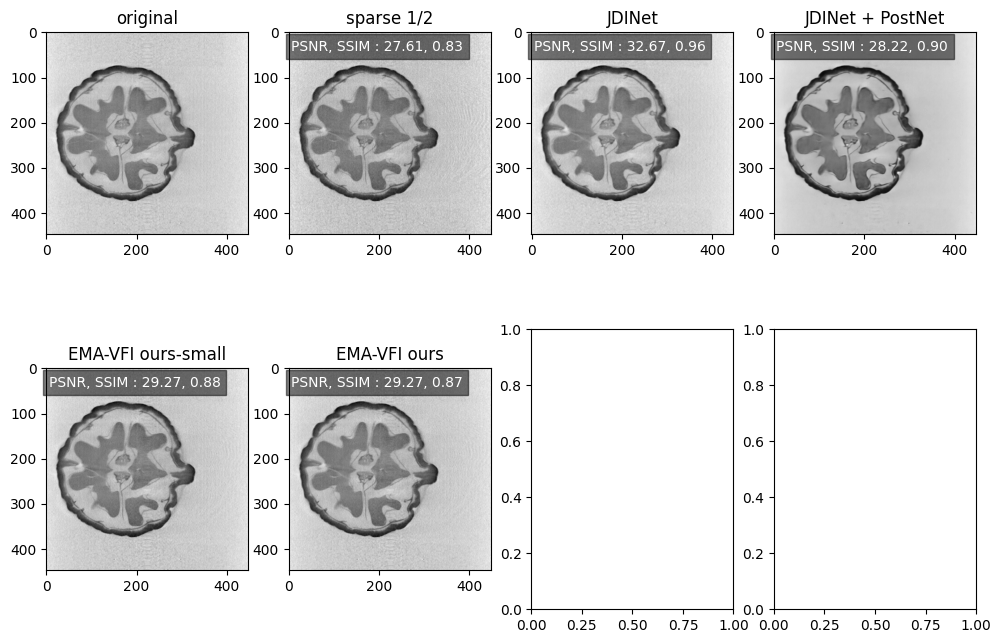

In [3]:
%cd /home/byeoli0832/sparse_view_test/FusionLowDoseCBCT
%pwd

import matplotlib.pyplot as plt
import imageio as iio
import os
import numpy as np

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def compute_ssim(img1, img2):
  ssim_value, _ = ssim(img1, img2, full=True)
  return ssim_value

def compute_psnr(img1, img2, max_val=1.0):
  # PSNR 계산
  return psnr(img1, img2, data_range=max_val)

def img_normal(img):
    return ((img - img.min()) / (img.max() - img.min())).astype(np.float32)

origin_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div1_fkd"
sparse_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div2_fkd"
jdinet_interp_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation_fkd"
jdinet_interp_fdk_post = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation_fkd_post"
emavfi_ours_small_interp_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_small_walnut19_div2_interpolation_fdk"
emavfi_ours_interp_ours_fdk = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_walnut19_div2_interpolation_fdk"

file_name = "fdk_000113.png"

fig, ax = plt.subplots(2, 4, figsize=(12, 8))

img1 = iio.imread(os.path.join(origin_fdk, file_name))
img2 = iio.imread(os.path.join(sparse_fdk, file_name))
img3 = iio.imread(os.path.join(jdinet_interp_fdk, file_name))
img4 = iio.imread(os.path.join(jdinet_interp_fdk_post, file_name))
img5 = iio.imread(os.path.join(emavfi_ours_small_interp_fdk, file_name))
img6 = iio.imread(os.path.join(emavfi_ours_interp_ours_fdk, file_name))

img1_normal = img_normal(img1)
img2_normal = img_normal(img2)
img3_normal = img_normal(img3)
img4_normal = img_normal(img4)
img5_normal = img_normal(img5)
img6_normal = img_normal(img6)

font = 10

ax[0][0].imshow(img1, cmap='gray')
ax[0][0].set_title("original")

ax[0][1].imshow(img2, cmap='gray')
ax[0][1].set_title("sparse 1/2")
ax[0][1].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img2_normal):.2f}, {compute_ssim(img1_normal, img2_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[0][2].imshow(img3, cmap='gray')
ax[0][2].set_title("JDINet")
ax[0][2].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img3_normal):.2f}, {compute_ssim(img1_normal, img3_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[0][3].imshow(img4, cmap='gray')
ax[0][3].set_title("JDINet + PostNet")
ax[0][3].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img4_normal):.2f}, {compute_ssim(img1_normal, img4_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[1][0].imshow(img5, cmap='gray')
ax[1][0].set_title("EMA-VFI ours-small")
ax[1][0].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img5_normal):.2f}, {compute_ssim(img1_normal, img5_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[1][1].imshow(img6, cmap='gray')
ax[1][1].set_title("EMA-VFI ours")
ax[1][1].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img6_normal):.2f}, {compute_ssim(img1_normal, img6_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

plt.show()

### interpolation 결과 비교

In [4]:
%cd /home/byeoli0832/sparse_view_test/FusionLowDoseCBCT
%pwd

import matplotlib.pyplot as plt
import imageio as iio
import os
import numpy as np

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def compute_ssim(img1, img2):
  ssim_value, _ = ssim(img1, img2, full=True)
  return ssim_value

def compute_psnr(img1, img2, max_val=1.0):
  # PSNR 계산
  return psnr(img1, img2, data_range=max_val)

def img_normal(img):
    return ((img - img.min()) / (img.max() - img.min())).astype(np.float32)

data_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div1"
jdinet_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation"
emavfi_ours_small_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_small_walnut19_div2_interpolation"
emavfi_ours_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_walnut19_div2_interpolation"

num_list = list(range(1, 500, 2))
img2_ssim = []
img2_psnr = []
img3_ssim = []
img3_psnr = []
img4_ssim = []
img4_psnr = []

for num in num_list:
  file_name = f"scan_{num:06d}.tif"
  img1 = iio.imread(os.path.join(data_folder_path, file_name))
  img2 = iio.imread(os.path.join(jdinet_folder_path, file_name))
  img3 = iio.imread(os.path.join(emavfi_ours_small_folder_path, file_name))
  img4 = iio.imread(os.path.join(emavfi_ours_folder_path, file_name))

  img1_normal = img_normal(img1)
  img2_normal = img_normal(img2)
  img3_normal = img_normal(img3)
  img4_normal = img_normal(img4)

  img2_ssim.append(compute_ssim(img1_normal, img2_normal))
  img2_psnr.append(compute_psnr(img1_normal, img2_normal))
  img3_ssim.append(compute_ssim(img1_normal, img3_normal))
  img3_psnr.append(compute_psnr(img1_normal, img3_normal))
  img4_ssim.append(compute_ssim(img1_normal, img4_normal))
  img4_psnr.append(compute_psnr(img1_normal, img4_normal))

print(f"JDINet(psnr, ssim) : ({np.mean(img2_psnr):0.2f}, {np.mean(img2_ssim):0.2f})")
print(f"ours_small(psnr, ssim) : ({np.mean(img3_psnr):0.2f}, {np.mean(img3_ssim):0.2f})")
print(f"ours(psnr, ssim) : ({np.mean(img4_psnr):0.2f}, {np.mean(img4_ssim):0.2f})")

/home/byeoli0832/sparse_view_test/FusionLowDoseCBCT


/var/tmp/ipykernel_560913/1997546242.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = iio.imread(os.path.join(data_folder_path, file_name))
/var/tmp/ipykernel_560913/1997546242.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = iio.imread(os.path.join(jdinet_folder_path, file_name))
/var/tmp/ipykernel_560913/1997546242.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` dir

JDINet(psnr, ssim) : (32.07, 0.97)
ours_small(psnr, ssim) : (37.63, 0.98)
ours(psnr, ssim) : (37.62, 0.98)


/home/byeoli0832/sparse_view_test/FusionLowDoseCBCT


/var/tmp/ipykernel_560913/2694637440.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = iio.imread(os.path.join(data_folder_path, file_name))
/var/tmp/ipykernel_560913/2694637440.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = iio.imread(os.path.join(jdinet_folder_path, file_name))
/var/tmp/ipykernel_560913/2694637440.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` dir

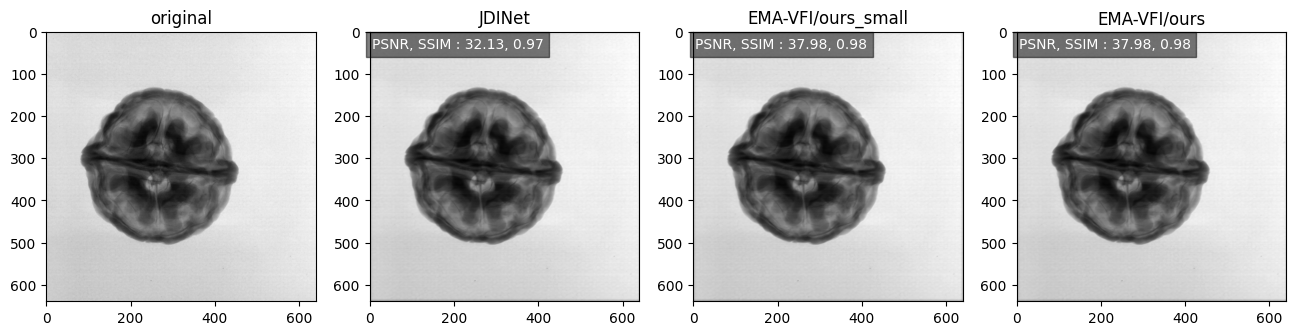

In [6]:
%cd /home/byeoli0832/sparse_view_test/FusionLowDoseCBCT
%pwd

import matplotlib.pyplot as plt
import imageio as iio
import os
import numpy as np

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def compute_ssim(img1, img2):
  ssim_value, _ = ssim(img1, img2, full=True)
  return ssim_value

def compute_psnr(img1, img2, max_val=1.0):
  # PSNR 계산
  return psnr(img1, img2, data_range=max_val)

def img_normal(img):
    return ((img - img.min()) / (img.max() - img.min())).astype(np.float32)

data_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/walnut19_div1"
jdinet_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/jdinet_walnut19_div2_interpolation"
emavfi_ours_small_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_small_walnut19_div2_interpolation"
emavfi_ours_folder_path = "/home/byeoli0832/sparse_view_test/walnut19_result/ours_walnut19_div2_interpolation"

# div2_interp_fdk의 홀수 넘버가 보간된 데이터 입니다.
file_name = "scan_000103.tif"

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

img1 = iio.imread(os.path.join(data_folder_path, file_name))
img2 = iio.imread(os.path.join(jdinet_folder_path, file_name))
img3 = iio.imread(os.path.join(emavfi_ours_small_folder_path, file_name))
img4 = iio.imread(os.path.join(emavfi_ours_folder_path, file_name))

img1_normal = img_normal(img1)
img2_normal = img_normal(img2)
img3_normal = img_normal(img3)
img4_normal = img_normal(img4)

font = 10

ax[0].imshow(img1, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(img2, cmap='gray')
ax[1].set_title("JDINet")
ax[1].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img2_normal):.2f}, {compute_ssim(img1_normal, img2_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[2].imshow(img2, cmap='gray')
ax[2].set_title("EMA-VFI/ours_small")
ax[2].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img3_normal):.2f}, {compute_ssim(img1_normal, img3_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

ax[3].imshow(img2, cmap='gray')
ax[3].set_title("EMA-VFI/ours")
ax[3].text(5, 40, f"PSNR, SSIM : {compute_psnr(img1_normal, img4_normal):.2f}, {compute_ssim(img1_normal, img4_normal):.2f}", 
fontsize=font, color="white", bbox=dict(facecolor='black', alpha=0.5))

plt.show()